# DIABETES DATASET
## FROM KAGGLE

### This dataset is originally from the N. Inst. of Diabetes & Diges. & Kidney Dis.

## About Dataset

### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

## Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Columns
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

Number of Instances: 768  <br>
Number of Attributes: 8 plus class  <br>
For Each Attribute: (all numeric-valued)  <br>
Missing Attribute Values: Yes  <br>
Class Distribution: (class value 1 is interpreted as "tested positive for
diabetes")


### Sources:
(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases <br>
(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
Research Center, RMI Group Leader <br>
Applied Physics Laboratory <br>
The Johns Hopkins University <br>
Johns Hopkins Road <br>
Laurel, MD 20707 <br>
(301) 953-6231

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the Data

In [2]:
db = pd.read_csv("C:\\Users\\DELL\\Desktop\\diabetes mew.csv")

### Data Overview

In [3]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
print(f"Diabetes data set dimensions : {(db.shape)}")

Diabetes data set dimensions : (768, 9)


### Data Cleaning


In [8]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
db.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

Observation <br>
We notice that minimum value for columns such as Glucose, BP, Insulin, BMI are 0 which is not possible. <br> Hence, these must be missing values which are encoded as 0 We can use imputation techniques to deal with these.

In [60]:
missing_data = db.loc[:,'Glucose':'BMI']
missing_data.replace(0,np.nan,inplace=True)
db.loc[:,'Glucose':'BMI'] = missing_data

In [61]:
db.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                28
SkinThickness               218
Insulin                     360
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Lets observe these missing values more closely and find out if their is any relation

In [12]:
#!pip install missingno
import missingno as msno

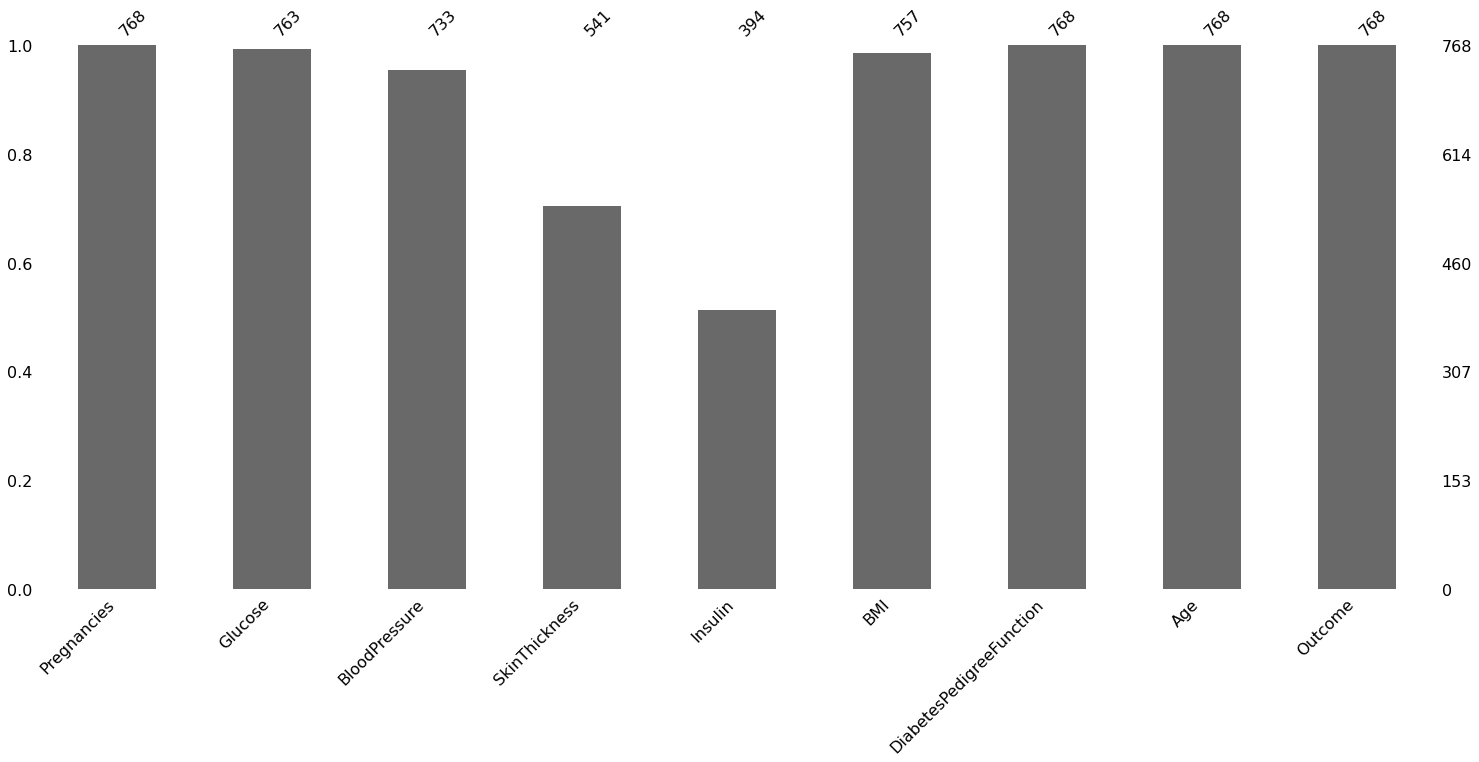

In [13]:
msno.bar(db);

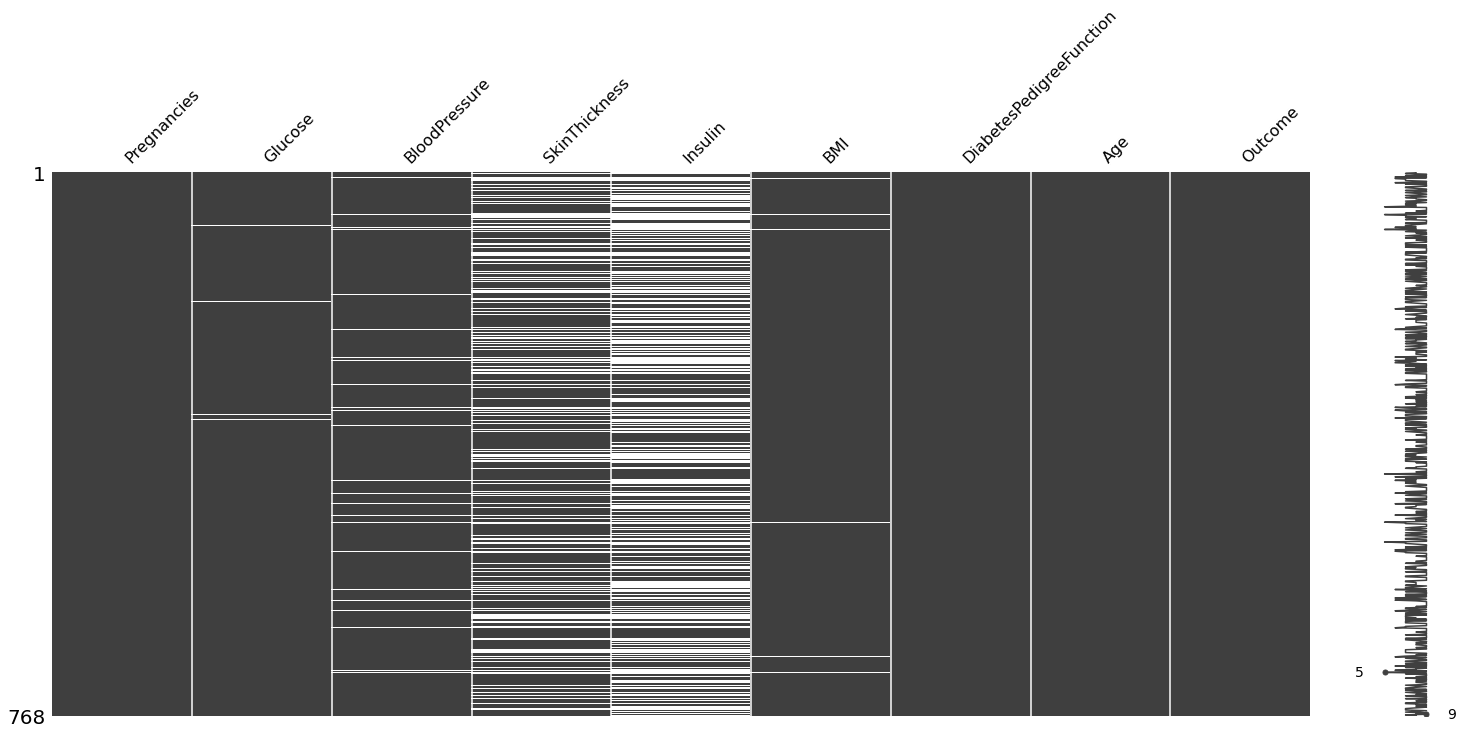

In [14]:
msno.matrix(db);
#msno.matrix(db.sort_values(by="Insulin"))

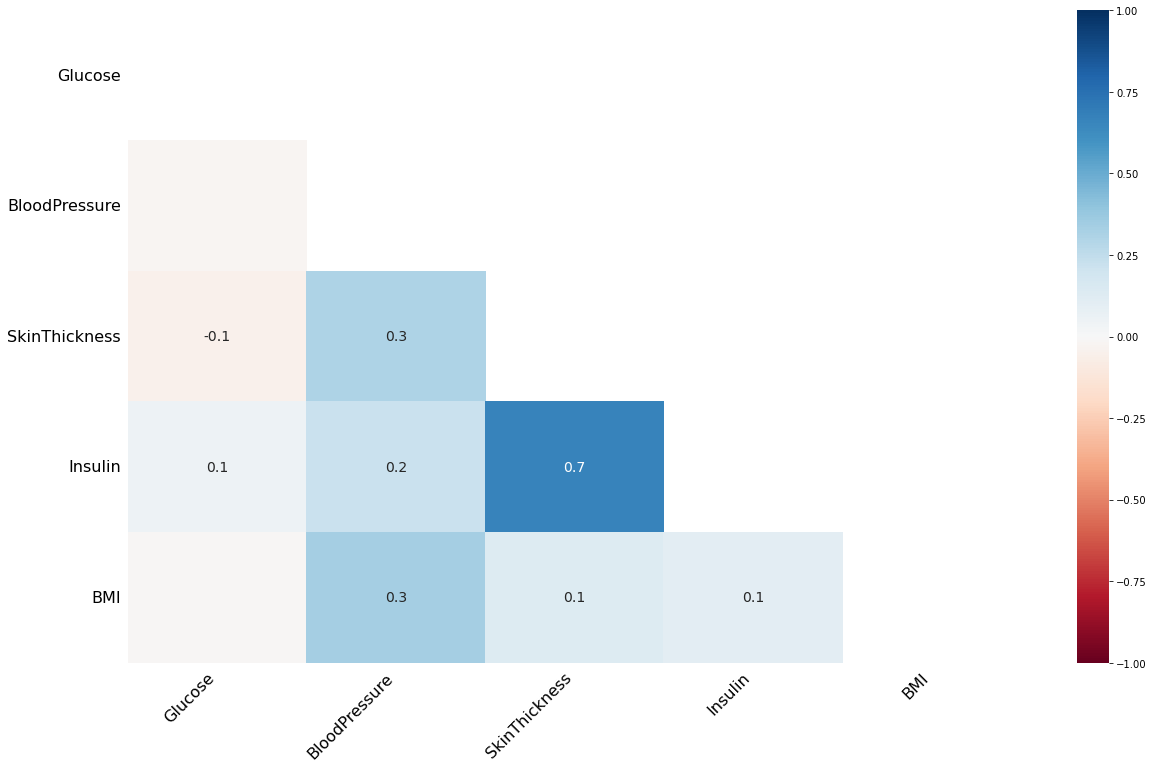

In [15]:
msno.heatmap(db);

We can see heavy correlation between SkinThickness and Insulin of  "0.7"

In [16]:
# drop rows having missing values for Glucose or BMI

db.dropna(subset=['Glucose','BMI'],inplace=True)

Using knnimputer we will fill the remaining missing values without impacting the variability of the dataset.

In [17]:
from sklearn.impute import KNNImputer

In [18]:
db_knn = db.copy()

imputer = KNNImputer(n_neighbors=9)

db_knn.iloc[:]=imputer.fit_transform(db_knn)

In [19]:
# Checking to see if there are any null values left
db_knn.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [66]:
db_knn.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.851064,121.941489,72.371454,29.133422,154.426123,32.454654,0.473051,33.312500,0.351064
std,3.375189,30.601198,12.206845,9.306928,96.569879,6.928926,0.330108,11.709395,0.477621
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,90.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.055556,137.000000,32.300000,0.377000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.000000,192.000000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Outlier removal

In [21]:
clean_db = db_knn

<AxesSubplot:xlabel='Pregnancies'>

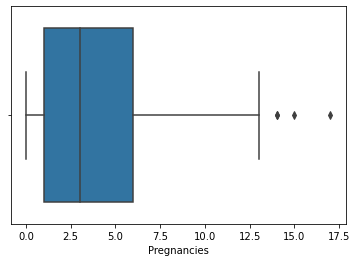

In [22]:
sns.boxplot(data=db_knn,x='Pregnancies')

Values above 13 is an outlier

In [75]:
clean_db = clean_db[clean_db['Pregnancies']<=13]

<AxesSubplot:xlabel='Glucose'>

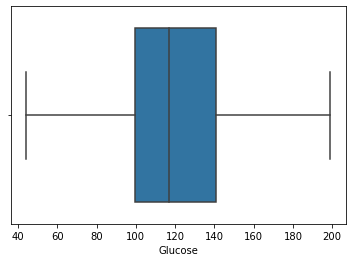

In [24]:
sns.boxplot(data=db_knn,x='Glucose')

The data is distribted normally, there is no outlier

<AxesSubplot:xlabel='BloodPressure'>

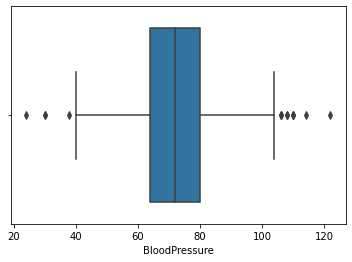

In [25]:
sns.boxplot(data=db_knn,x='BloodPressure')

Values below 30 and above 110 are outliers

In [26]:
clean_db=clean_db[clean_db['BloodPressure']>=30]
clean_db=clean_db[clean_db['BloodPressure']<=110]

<AxesSubplot:xlabel='SkinThickness'>

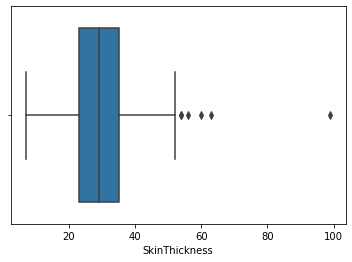

In [27]:
sns.boxplot(data=db_knn,x='SkinThickness')

Values above 70 are outliers

In [28]:
clean_db=clean_db[clean_db['SkinThickness']<=70]

<AxesSubplot:xlabel='Insulin'>

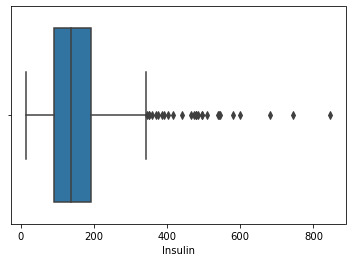

In [29]:
sns.boxplot(data=db_knn,x='Insulin')

Values above 500 are Outliers

In [30]:
clean_db=clean_db[clean_db['Insulin']<=500]

<AxesSubplot:xlabel='Age'>

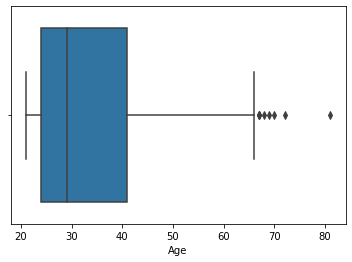

In [31]:
sns.boxplot(data=db_knn,x='Age')

Values above 75 are outliers

In [77]:
clean_db=clean_db[clean_db['Age']<=75]

## Feature Engineering

In [33]:
# Adding a column for the different BMI ranges

#define bins 
bins = [0, 18.5, 24.9, 29.9, 67.1]

#name of groups
groups = ['Underweight', 'NormalWeight', 'OverWeight', 'Obese']

#A=
clean_db['BMI_Categories'] = pd.cut(clean_db['BMI'], bins=bins, labels=groups)


In [34]:
# # Adding a column for the different Glucose level

# #define bins 
# bins = [0, 100.0, 125.0, 199.0]

# #name of groups
# groups = ['Normal', 'Prediabetes', 'Diabetes']

# #A=
# clean_db['Glucose_Categories'] = pd.cut(clean_db['BMI'], bins=bins, labels=groups)

In [87]:
# sns.histplot(data=clean_db,x='BMI_Categories',hue='Outcome',kde=True);

## Exploratory Data Analysis (EDA)

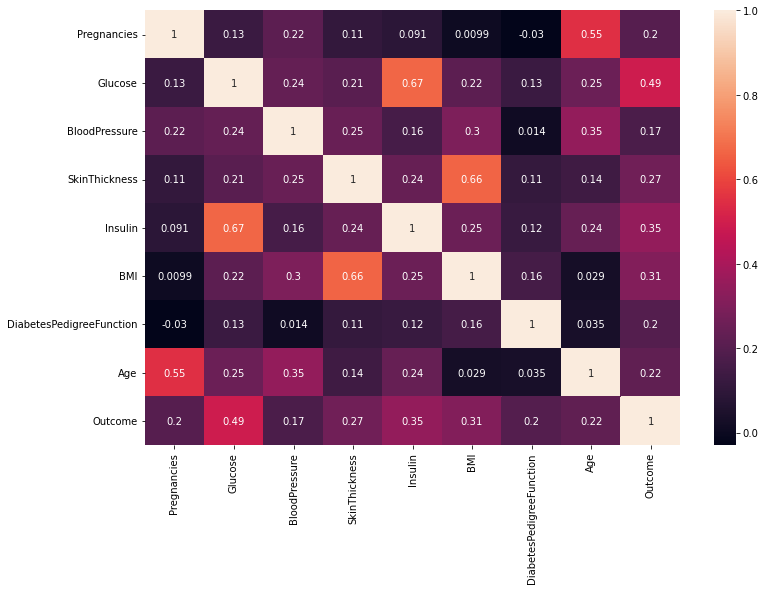

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(clean_db.corr(),annot=True);

In [36]:
#sns.pairplot(clean_db);

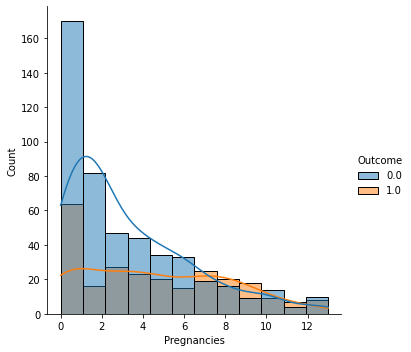

In [37]:
sns.displot(data=clean_db,x='Pregnancies',hue='Outcome',kde=True);

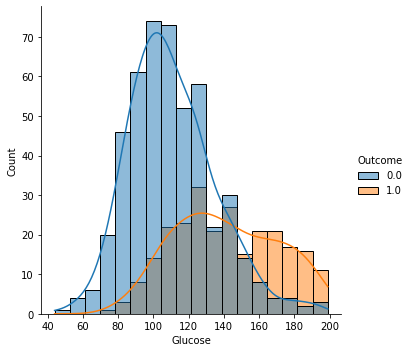

In [38]:
sns.displot(data=clean_db,x='Glucose',hue='Outcome',kde=True);

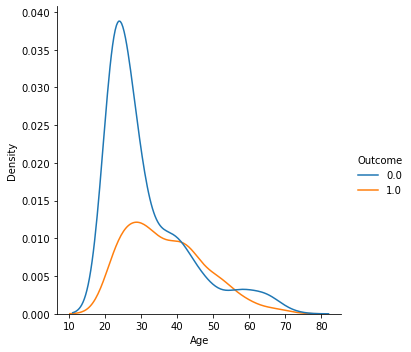

In [39]:
sns.displot(data=clean_db,x='Age',hue='Outcome',kind='kde');

In [40]:
# #define plotting region (4 rows, 2 columns)
# fig, axes = plt.subplots(4, 2, figsize=(12,10))

  
    
# # Adjust subplots so that titles don't overlap
# fig.subplots_adjust( top = 2.1 )

#     # Title for the complete figure
# #fig.suptitle("Data Distribution" , fontsize = 'x-large' , fontweight = 'bold' )

# #The alpha parameter controls the opacity of the bars. The value can be set to any value from 0 to 1.

# #Pregnancy distribution
# sns.histplot( clean_db['Pregnancies'] , color="navy", alpha= 0.7, ax=axes[0,0]).set(title='Pregnancy Distribution')
# #Glucose distribution
# sns.histplot( clean_db['Glucose'] , color="navy", alpha= 0.7, ax=axes[0,1]).set(title='Glucose Distribution')
# #BloodPressure distribution
# sns.histplot( clean_db['BloodPressure'] , color="navy", alpha= 0.7, ax=axes[1,0]).set(title='Blood Pressure Distribution')
# #SkinThickness distribution
# sns.histplot( clean_db['SkinThickness'] , color="navy", alpha= 0.7, ax=axes[1,1]).set(title='Skin Thickness Distribution')
# #Insulin distribution
# sns.histplot( clean_db['Insulin'] , color="navy", alpha= 0.7, ax=axes[2,0]).set(title='Insulin Distribution')
# #BMI distribution
# sns.histplot( clean_db['BMI'] , color="navy", alpha= 0.7, ax=axes[2,1]).set(title='BMI Distribution')
# #DiabetesPedigreeFunction
# sns.histplot( clean_db['DiabetesPedigreeFunction'] , color="navy", alpha= 0.7, ax=axes[3,0]).set(title='DiabetesPedigreeFunction Distribution')
# #Age distribution
# sns.histplot( clean_db['Age'] , color="navy", alpha= 0.7, ax=axes[3,1]).set(title='Age Distribution');

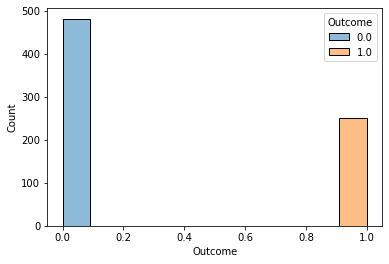

In [41]:
sns.histplot(data=clean_db,x='Outcome', hue='Outcome');

In [42]:
clean_db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Categories
0,6.0,148.0,72.0,35.000000,211.666667,33.6,0.627,50.0,1.0,Obese
1,1.0,85.0,66.0,29.000000,67.444444,26.6,0.351,31.0,0.0,OverWeight
2,8.0,183.0,64.0,25.888889,189.000000,23.3,0.672,32.0,1.0,NormalWeight
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0,OverWeight
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0,Obese


## Training the Data

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
X=clean_db[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',
            'DiabetesPedigreeFunction','Age']]
y=clean_db['Outcome']

In [45]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000000,211.666667,33.6,0.627,50.0
1,1.0,85.0,66.0,29.000000,67.444444,26.6,0.351,31.0
2,8.0,183.0,64.0,25.888889,189.000000,23.3,0.672,32.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0


In [46]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Creating and Training the Model

In [48]:
lm = LinearRegression()

In [49]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [50]:
print(lm.intercept_)

-1.1579120634041729


In [51]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Pregnancies,0.009481
Glucose,0.007082
BloodPressure,0.000011
SkinThickness,-0.000030
Insulin,-0.000241
BMI,0.014169
DiabetesPedigreeFunction,0.176845
Age,0.002626


## Predictions from our Model

In [52]:
predict = lm.predict(X_test)

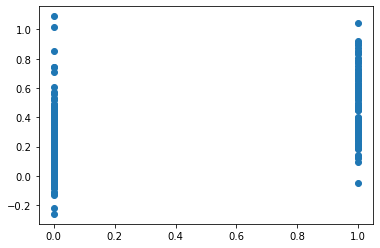

In [53]:
plt.scatter(y_test,predict);

In [54]:
from sklearn import metrics

In [55]:
# print('MAE:', metrics.mean_absolute_error(y_test, predictions))
# print('MSE:', metrics.mean_squared_error(y_test, predictions))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))